# Class Distribution

> Train Dataset

```
MISSING: 94411 -> 94411 (selected 100%)
RAIN_ONLY: 9575 -> 94411 (copied x10) (Including "DRIZZLE_ONLY", "FREEZING_PRECIP")
SNOW_ONLY: 21465 -> 94411 (copied x5) (Including "RAIN_AND_SNOW")
```

> Test/Validation Dataset

```
MISSING: 1000
RAIN_ONLY: 1000 (Including "DRIZZLE_ONLY", "FREEZING_PRECIP")
SNOW_ONLY: 1000 (Including "RAIN_AND_SNOW")
```

# Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

file_names = ["reduced_class_test_images"]
folder_names = ["test_images"]

for file_name, folder_name in zip(file_names, folder_names):
  # Path to the ZIP file (could be from your Colab environment or Google Drive)
  zip_file_path = f'/content/drive/My Drive/Webcam_Project/datasets/reduced_class_images/{file_name}.zip'

  # Create target directory if it doesn't exist
  if not os.path.exists(folder_name):
      os.makedirs(folder_name)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(folder_name)

  print(f'Files extracted to {folder_name}')

Files extracted to test_images


In [3]:
CLASS_NAMES = ['MISSING', 'RAIN_ONLY', 'SNOW_ONLY']

In [4]:
!find ./test_images/MISSING -maxdepth 1 -type f | wc -l
!find ./test_images/RAIN_ONLY -maxdepth 1 -type f | wc -l
!find ./test_images/SNOW_ONLY -maxdepth 1 -type f | wc -l

1000
1000
1000


In [5]:
provincial_code = ['AB', 'BC', 'MB', 'NF', 'NS', 'NT', 'NU', 'ON', 'QC', 'YT']
provincial_report = [code + '_ASOS_Matched.csv' for code in provincial_code]

In [6]:
import pandas as pd
import os

reports = {}

for report, code in zip(provincial_report, provincial_code):
    reports[code] = pd.read_csv(f"/content/drive/My Drive/Webcam_Project/Provincial_Matched/{report}")

<ipython-input-6-1d6ff0ce3159>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(f"/content/drive/My Drive/Webcam_Project/Provincial_Matched/{report}")
<ipython-input-6-1d6ff0ce3159>:7: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(f"/content/drive/My Drive/Webcam_Project/Provincial_Matched/{report}")
<ipython-input-6-1d6ff0ce3159>:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(f"/content/drive/My Drive/Webcam_Project/Provincial_Matched/{report}")
<ipython-input-6-1d6ff0ce3159>:7: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(f"/content/drive/My Drive/Webcam_Project/Provincial_Matched/{report}")


In [7]:
report_comb = pd.concat([reports[code] for code in reports.keys()], keys=list(reports.keys()))

In [8]:
report_comb.head()

station             valid  tmpc    dwpc   relh    drct  sknt     mslp  \
AB 0    CYQF  2022-12-16 00:00  -8.0  -11.00  79.00  240.00  5.00  1032.60   
   1    CYQL  2022-12-16 00:00  -6.0   -9.00  79.31  250.00  4.00  1034.00   
   2    CYLL  2022-12-16 00:00 -15.0  -17.00  84.68  280.00  6.00  1030.50   
   3    CYOJ  2022-12-16 00:00 -12.0  -13.00  92.25  180.00  2.00  1028.70   
   4    CYZU  2022-12-16 00:00  -4.0   -7.00  79.62  290.00  4.00  1030.40   

      p01m   vsby  ...   Hail     GS     IP     DZ FZRA/FZDZ  \
AB 0   0.0   9.00  ...  False  False  False  False     False   
   1   0.0  25.00  ...  False  False  False  False     False   
   2   0.0   6.00  ...  False  False  False  False     False   
   3   0.0  10.00  ...  False  False  False  False     False   
   4   0.0  15.00  ...  False  False  False  False     False   

     precipitation_category             valid_dt matched_image_file  \
AB 0                MISSING  2022-12-16 00:00:00                NaN   
   1                MISSING  2022-12-16 00:00:00                NaN   
   2                    NaN  2022-12-16 00:00:00                NaN   
   3              SNOW_ONLY  2022-12-16 00:00:00                NaN   
   4                MISSING  2022-12-16 00:00:00                NaN   

     matched_image_folder p01i  
AB 0                  NaN  NaN  
   1                  NaN  NaN  
   2                  NaN  NaN  
   3                  NaN  NaN  
   4                  NaN  NaN  

[5 rows x 35 columns]

In [9]:
import pandas as pd

filename_to_temp_map = {}

def is_valid_float(string):
  try:
    float(string)
    return True
  except ValueError:
    return False

for metar_file_info, row in report_comb.iterrows():
  filename = row['matched_image_file']
  temp = row['tmpc']

  if type(temp) == str and is_valid_float(temp):
    temp = float(temp)
  else:
    continue

  if not pd.isna(filename) and not pd.isna(temp):
    filename_to_temp_map[filename] = temp

In [10]:
filename_to_temp_map

{'CYQF-W-2023_03_15-07_44_30.jpg': -11.0,
 'CYQF-W-2023_03_15-07_54_30.jpg': -11.0,
 'CYQL-SW-2023_03_15-08_04_30.jpg': -2.0,
 'CYQF-W-2023_03_15-08_04_30.jpg': -11.0,
 'CYOJ-NE-2023_03_15-08_04_30.jpg': -22.0,
 'CYLL-NW-2023_03_15-08_04_30.jpg': -14.0,
 'CYQF-W-2023_03_15-08_14_30.jpg': -12.0,
 'CYQF-W-2023_03_15-08_24_30.jpg': -12.0,
 'CYQF-W-2023_03_15-08_34_30.jpg': -13.0,
 'CYQF-W-2023_03_15-08_54_30.jpg': -16.0,
 'CYQF-W-2023_03_15-09_04_30.jpg': -17.0,
 'CYQL-SW-2023_03_15-09_04_30.jpg': -2.0,
 'CYOJ-NE-2023_03_15-09_04_30.jpg': -20.0,
 'CYLL-NW-2023_03_15-09_04_30.jpg': -14.0,
 'CYQF-W-2023_03_15-09_14_30.jpg': -17.0,
 'CYQF-W-2023_03_15-09_34_30.jpg': -14.0,
 'CYOJ-NE-2023_03_15-09_44_30.jpg': -17.0,
 'CYLL-NW-2023_03_15-10_04_30.jpg': -16.0,
 'CYOJ-NE-2023_03_15-10_04_30.jpg': -17.0,
 'CYQL-SW-2023_03_15-10_04_30.jpg': -2.0,
 'CYQF-W-2023_03_15-10_04_30.jpg': -14.0,
 'CYQF-W-2023_03_15-10_14_30.jpg': -14.0,
 'CYOJ-NE-2023_03_15-10_34_30.jpg': -17.0,
 'CYOJ-NE-2023_03_15-10_44

In [11]:
test_dataset_pre_df = []

In [12]:
import os
from typing import List, Dict

def remove_copy_code(file_name: str) -> str:
    if len(file_name.split('_')) == 7:
        return '_'.join(file_name.split('_')[2:])
    return file_name

def trim_file_name(file_name: str) -> str:
    return '-'.join(file_name.split('-')[:-1]) + '.jpg'

def list_files_and_iterate(directory_path: str, label: str, dataset: List[Dict[str, str]]):
    # Check if the specified path is indeed a directory
    if not os.path.isdir(directory_path):
        print(f"The provided path '{directory_path}' is not a valid directory.")
        return

    # List all files in the specified directory
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    # Iterate over each file path
    for file_name in files:
        trimmed_file_name = trim_file_name(remove_copy_code(file_name))
        if trimmed_file_name in filename_to_temp_map:
          image_path = os.path.join(directory_path, file_name)
          temperature = filename_to_temp_map[trimmed_file_name]
          dataset.append({'image_path': image_path, 'temperature': temperature, 'label': label})

In [13]:
list_files_and_iterate(
    directory_path='./test_images/MISSING',
    label='MISSING',
    dataset=test_dataset_pre_df
)
list_files_and_iterate(
    directory_path='./test_images/RAIN_ONLY',
    label='RAIN_ONLY',
    dataset=test_dataset_pre_df
)
list_files_and_iterate(
    directory_path='./test_images/SNOW_ONLY',
    label='SNOW_ONLY',
    dataset=test_dataset_pre_df
)

In [14]:
import pandas as pd

test_dataset_df = pd.DataFrame(test_dataset_pre_df)

In [15]:
test_dataset_df.head()

,image_path,temperature,label
0,./test_images/MISSING/CYQF-W-2023_10_10-19_04_...,20.0,MISSING
1,./test_images/MISSING/CZFN-W-2023_03_21-21_34_...,-7.0,MISSING
2,./test_images/MISSING/CYOJ-NE-2023_06_11-05_54...,22.0,MISSING
3,./test_images/MISSING/CYQB-SW-2023_05_07-15_54...,19.0,MISSING
4,./test_images/MISSING/CYYD-SW-2023_08_16-13_54...,9.0,MISSING


In [16]:
def balance_dataset(dataset_df):
    # Step 1: Find the least common label count
    min_count = dataset_df['label'].value_counts().min()

    # Step 2: Sample min_count rows for each label
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to hold the balanced dataset
    for label in dataset_df['label'].unique():
        # Randomly sample min_count rows for this label
        sampled_df = dataset_df[dataset_df['label'] == label].sample(n=min_count, random_state=42)  # random_state for reproducibility
        balanced_df = pd.concat([balanced_df, sampled_df])

    # Reset index of the resulting DataFrame
    balanced_df = balanced_df.reset_index(drop=True)

    return balanced_df

In [17]:
balanced_test_dataset_df = balance_dataset(test_dataset_df)

In [18]:
balanced_test_value_counts = balanced_test_dataset_df['label'].value_counts()
balanced_test_value_counts

label
MISSING      424
RAIN_ONLY    424
SNOW_ONLY    424
Name: count, dtype: int64

In [19]:
balanced_test_dataset_df.to_csv('test_dataset.csv', index=False)

# Finetuning Model

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

label_mapping = {'MISSING': 0, 'RAIN_ONLY': 1, 'SNOW_ONLY': 2}

class HybridDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
      # Access columns by name
      img_name = self.data_frame.loc[idx, "image_path"]  # Column name for image paths
      image = Image.open(img_name).convert('RGB')
      temperature = float(self.data_frame.loc[idx, "temperature"])  # Convert to float
      label = label_mapping[self.data_frame.loc[idx, "label"]]
      label = torch.tensor(label, dtype=torch.long)  # Convert label to a tensor
      temperature = torch.tensor([temperature], dtype=torch.float32)

      if self.transform:
          image = self.transform(image)

      sample = {'image': image, 'temperature': temperature, 'label': label}

      return sample

# Define your transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [21]:
# Create dataset
test_dataset = HybridDataset(csv_file='test_dataset.csv', transform=transform)

In [22]:
# Create DataLoaders
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [23]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
# Assuming HybridDataset is defined as in the previous examples

class HybridWeatherModel(nn.Module):
    def __init__(self, num_classes=3):
        super(HybridWeatherModel, self).__init__()
        # Load DenseNet201 and remove its classifier
        self.densenet = models.densenet201(pretrained=True)
        self.densenet.classifier = nn.Identity()

        # Define a linear layer for combining DenseNet201 features and temperature
        # DenseNet201 features size + 1 temperature value
        self.classifier = nn.Linear(1920 + 1, num_classes)

    def forward(self, image, temperature):
        image_features = self.densenet(image)
        combined_features = torch.cat((image_features, temperature), dim=1)
        output = self.classifier(combined_features)
        return output

In [24]:
# Instantiate the model
model = HybridWeatherModel(num_classes=3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 176MB/s]


In [25]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [26]:
# Path to your saved model weights
model_weights_path = f'/content/drive/My Drive/Webcam_Project/model_weights/new_models/densenet201_hybrid_model_weights.pth'

# Load the weights into the model
model.load_state_dict(torch.load(model_weights_path, map_location=device))

<All keys matched successfully>

# Running Inference

In [27]:
# Validation phase
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No gradients needed
    for batch in test_loader:
        images = batch['image'].to(device)
        temperatures = batch['temperature'].to(device)
        labels = batch['label'].to(device)

        outputs = model(images, temperatures)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

acc = 100 * correct / total

print(f'Test Accuracy: {acc:.2f}%')

Test Accuracy: 86.64%


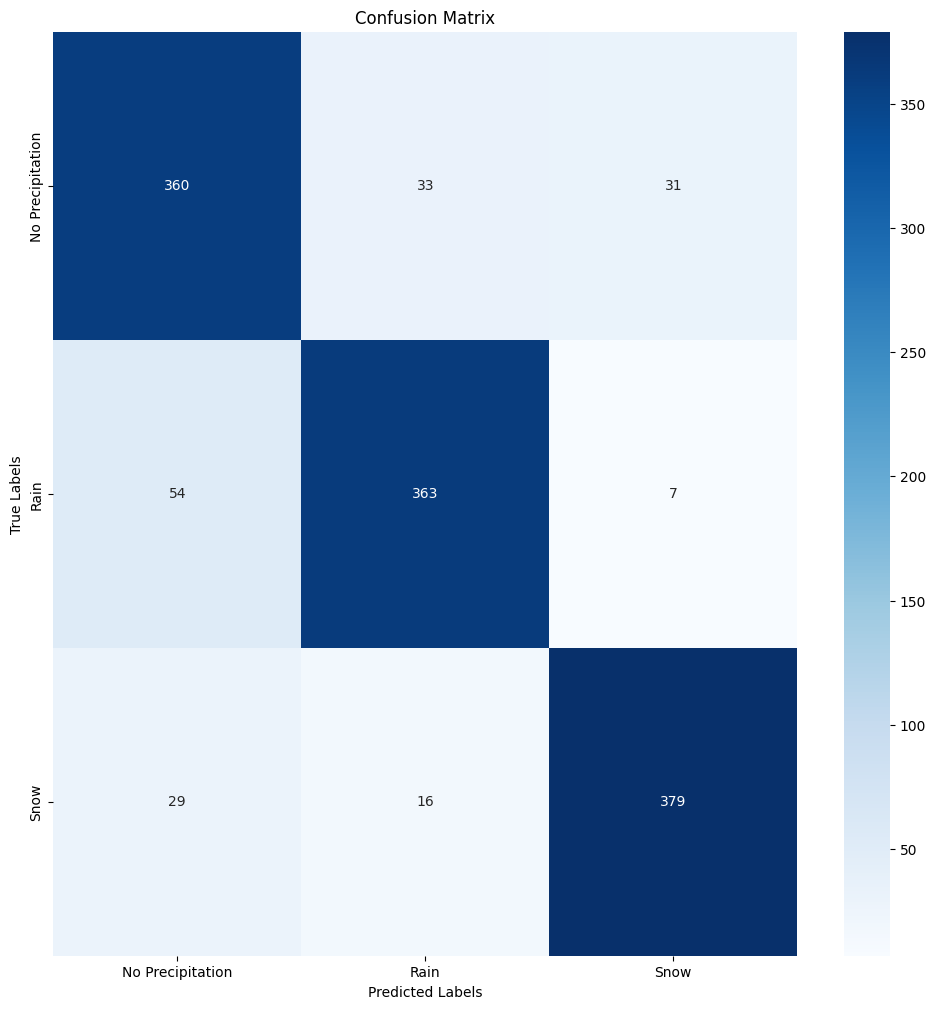

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

class_names = ["No Precipitation", "Rain", "Snow"]

model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # No gradients needed
    for batch in test_loader:
        images = batch['image'].to(device)
        temperatures = batch['temperature'].to(device)
        labels = batch['label'].to(device)

        outputs = model(images, temperatures)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [29]:
# Calculate class accuracies from the confusion matrix
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# Print class accuracies
print("Accuracy per class:")
for class_name, accuracy in zip(class_names, class_accuracies):
    print(f"{class_name}: {accuracy * 100:.2f}%")

Accuracy per class:
No Precipitation: 84.91%
Rain: 85.61%
Snow: 89.39%


# Match Rain (>= 3 deg) and Snow (<= -1 deg)

Measurements:
- For Precipitations (Rain or Snow)
- TP / Total for each Rain and Snow

In [ ]:
model.eval()  # Set the model to evaluation mode
total = 0

# New counters for your specific conditions
precip_when_cold = 0
actual_snow_when_cold = 0
predicted_snow_when_cold = 0
precip_when_warm = 0
actual_rain_when_warm = 0
predicted_rain_when_warm = 0

with torch.no_grad():  # No gradients needed
    for batch in test_loader:
        images = batch['image'].to(device)
        temperatures = batch['temperature'].to(device)
        labels = batch['label'].to(device)

        outputs = model(images, temperatures)
        _, predicted = torch.max(outputs.data, 1)

        # Define conditions based on temperature
        cold_condition = temperatures <= -1
        warm_condition = temperatures >= 3

        # Increment counters based on conditions
        precip_when_cold += (((labels == 1) | (labels == 2)) & cold_condition.squeeze()).sum().item()
        actual_snow_when_cold += ((labels == 2) & cold_condition.squeeze()).sum().item()
        predicted_snow_when_cold += ((predicted == 2) & ((labels == 1) | (labels == 2)) & cold_condition.squeeze()).sum().item()

        precip_when_warm += (((labels == 1) | (labels == 2)) & warm_condition.squeeze()).sum().item()
        actual_rain_when_warm += ((labels == 1) & warm_condition.squeeze()).sum().item()
        predicted_rain_when_warm += ((predicted == 1) & ((labels == 1) | (labels == 2)) & warm_condition.squeeze()).sum().item()

        total += labels.size(0)

In [ ]:
print(f"Actual percentage of Snow / Snow + Rain (All Precip) under -1 deg: {((actual_snow_when_cold / precip_when_cold) * 100):.2f}")
print(f"Predicted percentage of Snow / Snow + Rain (All Precip) under -1 deg: {((predicted_snow_when_cold / precip_when_cold) * 100):.2f}")
print(f"Actual percentage of Rain / Snow + Rain (All Precip) over 3 deg: {((actual_rain_when_warm / precip_when_warm) * 100):.2f}")
print(f"Predicted percentage of Rain / Snow + Rain (All Precip) over 3 deg: {((predicted_rain_when_warm / precip_when_warm) * 100):.2f}")

Actual percentage of Snow / Snow + Rain (All Precip) under -1 deg: 100.00
Predicted percentage of Snow / Snow + Rain (All Precip) under -1 deg: 92.70
Actual percentage of Rain / Snow + Rain (All Precip) over 3 deg: 99.49
Predicted percentage of Rain / Snow + Rain (All Precip) over 3 deg: 87.18
